In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

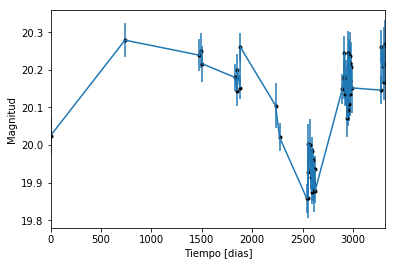

In [2]:
data = np.genfromtxt('LC_19055_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

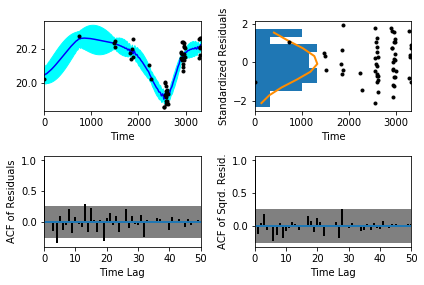

In [5]:
sample.assess_fit()

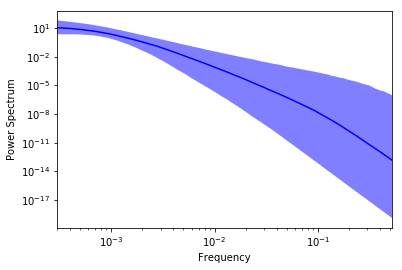

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.188218,'Medida del nivel de ruido')

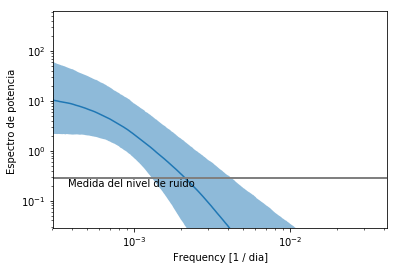

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

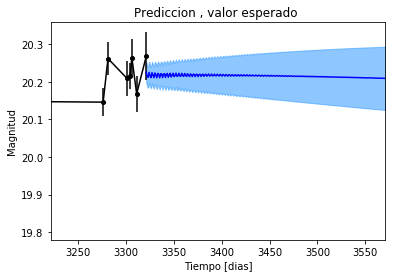

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

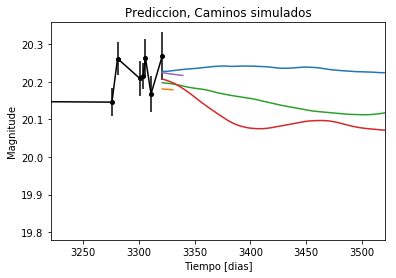

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


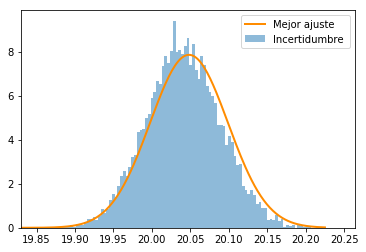

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

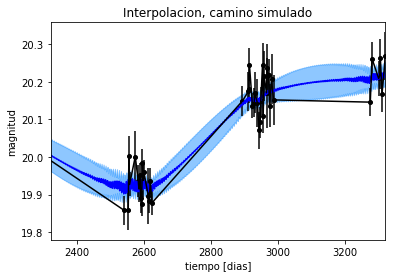

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

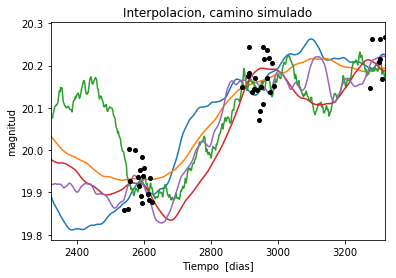

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 604.30434686
Median: 0.00943650621969
Standard deviation: 0.191469117766
68% credibility interval: [ 0.00069621  0.17782523]
95% credibility interval: [  3.36358867e-04   7.56966711e-01]
99% credibility interval: [  3.10245348e-04   9.87561246e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2906.9989053
Median: 0.00151867292135
Standard deviation: 0.101756290501
68% credibility interval: [ 0.00043906  0.02307246]
95% credibility interval: [ 0.0003168   0.27199219]
99% credibility interval: [  3.05812358e-04   8.39915782e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1423.90797102
Median: 0.0138254307464
Standard de

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 477.677580966
Median: 0.00138627768721
Standard deviation: 0.240110200874
68% credibility interval: [ 0.          0.30600104]
95% credibility interval: [ 0.          0.89652297]
99% credibility interval: [ 0.          1.02448065]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 477.677580966
Median: 0.00138627768721
Standard deviation: 0.240110200874
68% credibility interval: [ 0.          0.30600104]
95% credibility interval: [ 0.          0.89652297]
99% credibility interval: [ 0.          1.02448065]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 569.894522519
Median: 0.0
Standard deviation: 0.000307155207251
68% 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1980.38338048
Median: 101.165628493
Standard deviation: 1.58009982972
68% credibility interval: [  99.43351918  102.24959089]
95% credibility interval: [  96.85300801  102.93496309]
99% credibility interval: [  94.82509572  103.45412268]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 823.923010797
Median: 0.635717124375
Standard deviation: 2.1393830695
68% credibility interval: [ 0.04821847  3.59254307]
95% credibility interval: [ 0.01253776  7.00248013]
99% credibility interval: [  9.45628542e-03   1.14470319e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 788.065670924
Median: 0.265342676302
Standard deviation: 9.4668559053
68% credibility interval: [ 0.01046051  6.24110177]
95% credibility interval: [  6.009

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1923.522426
Median: 1.98220438085e-34
Standard deviation: 5.36788223364e+20
68% credibility interval: [  7.23945075e-78   1.52427973e-06]
95% credibility interval: [  6.20388539e-125   4.16589459e+001]
99% credibility interval: [  6.04897974e-134   3.00597150e+019]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2980.99793254
Median: 20.1391972729
Standard deviation: 0.0804823224559
68% credibility interval: [ 20.0719245   20.20594808]
95% credibility interval: [ 19.97605588  20.30213048]
99% credibility interval: [ 19.86802036  20.39919218]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 477.677580966
Median: 0.00138627768721
Standard deviation: 0.240110200874
68% credibility interval: [ 0.          0.30600104]
95% credibility interval: [ 0.          0.89652297]
99% credibility interval: [ 0.          1.02448065]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 477.677580966
Median: 0.00138627768721
Standard deviation: 0.240110200874
68% credibility interval: [ 0.          0.30600104]
95% credibility interval: [ 0.          0.89652297]
99% credibility interval: [ 0.          1.02448065]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 569.894522519
Median: 0.0
Standard deviation: 0.000307155207251
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1980.38338048
Median: 101.165628493
Standard deviation: 1.58009982972
68% credibility interval: [  99.43351918  102.24959089]
95% credibility interval: [  96.85300801  102.93496309]
99% credibility interval: [  94.82509572  103.45412268]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2546.79850153
Median: 0.0194445844262
Standard deviation: 0.0268105032426
68% credibility interval: [ 0.01069966  0.03838604]
95% credibility interval: [ 0.00662301  0.08778061]
99% credibility interval: [ 0.00523813  0.15904002]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2358.37951548
Median: 1.06164817808
Standard deviation: 0.165203880281
68% credibility interval: [ 0.91402073  1.23531475]
95% credibility interval: [ 0.7958385   1.43939132]
99% credibility interval: [ 0.72252394  1.59133621]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 743.046003803
Median: 3.99625155438e-05
Standard deviation: 0.060471730358
68% credibility interval: [  7.05862504e-07   1.95842771e-03]
95% credibility interval: [  9.31998661e-09   8.36916112e-02]
99% credibility interval: [  1.80873968e-24   3.66818394e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 604.30434686
Median: (-0.0592913172307-6.14437413685j)
Standard deviation: 1.92959609541
68% credibility interval: [-1.11730890-5.99373309j -0.00437444+0.j        ]
95% credibility interval: [ -4.75616212e+00+0.j          -2.11340509e-03-0.00580733j]
99% credibility interval: [ -6.20503031e+00-6.4640045j  -1.94932901e-03-0.385447j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2906.9989053
Median: (-0.00954210338586+0j)
Standard deviation: 1.63854162712
68% credibility interval: [-0.14496851+1.04018588j -0.00275871+0.34261922j]
95% credibility interval: [-1.70897730+4.29027178j -0.00199054+0.35512982j]
99% credibility interval: [ -5.27734650e+00+5.89198263j  -1.92147572e-03+0.j        ]
Posterior summary for paramet